<a href="https://colab.research.google.com/github/MiguelFigueroa02/IA_Aumentada/blob/main/IA_Aumentada.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Aula 1: Explorando los datos.

In [ ]:
url_data = 'https://raw.githubusercontent.com/MiguelFigueroa02/IA_Aumentada/refs/heads/main/flights.csv'

In [ ]:
import requests

In [ ]:
url = requests.get(url_data)

In [ ]:
url

<Response [200]>

In [ ]:
import pandas as pd

In [ ]:
datos = pd.read_csv(url_data)

In [ ]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   flight_id       71175 non-null  int64  
 1   airline         71175 non-null  object 
 2   aircraft_type   71175 non-null  object 
 3   schengen        71175 non-null  object 
 4   origin          71175 non-null  object 
 5   arrival_time    71175 non-null  float64
 6   departure_time  71175 non-null  float64
 7   day             71175 non-null  int64  
 8   year            71175 non-null  int64  
 9   is_holiday      71175 non-null  bool   
 10  delay           71175 non-null  float64
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 5.5+ MB


In [ ]:
datos.head()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay
0,26,MM,Airbus A320,non-schengen,TCY,8.885071,10.885071,0,2010,False,70.205981
1,10,YE,Airbus A320,non-schengen,TCY,8.939996,11.939996,0,2010,False,38.484609
2,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,0,2010,False,2.388305
3,28,BZ,Airbus A330,non-schengen,EMM,15.967963,17.967963,0,2010,False,19.138491
4,15,BZ,Airbus A330,non-schengen,FJB,16.571894,19.571894,0,2010,False,15.016271


In [ ]:
datos.describe()

,flight_id,arrival_time,departure_time,day,year,delay
count,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000,71175.000000
mean,15.465135,13.283159,16.480222,182.000000,2016.000000,12.548378
std,8.649646,4.023380,4.143705,105.366769,3.741684,23.125349
min,1.000000,7.065594,10.065594,0.000000,2010.000000,-41.028033
25%,8.000000,8.939996,12.668655,91.000000,2013.000000,-4.412876
50%,15.000000,14.258911,16.376052,182.000000,2016.000000,9.740454
75%,23.000000,16.909690,20.041281,273.000000,2019.000000,27.650853
max,30.000000,19.341235,23.341235,364.000000,2022.000000,125.632352


In [ ]:
datos.describe(include='O')

,airline,aircraft_type,schengen,origin
count,71175,71175,71175,71175
unique,3,6,2,10
top,BZ,Airbus A320,schengen,TZF
freq,47598,30778,42569,14162


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


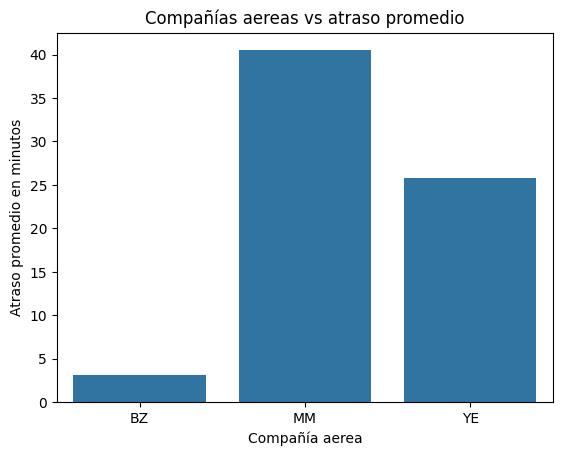

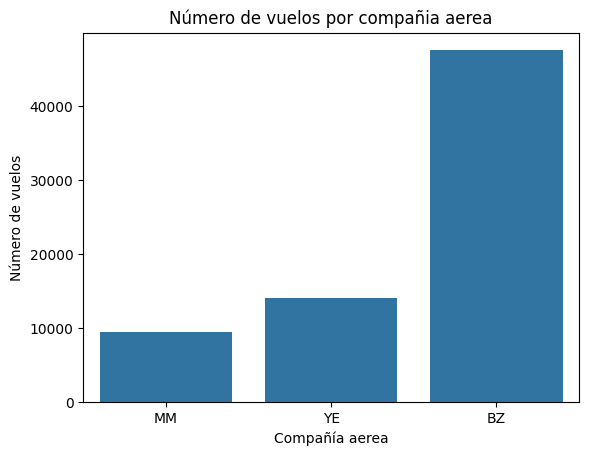

In [ ]:
avg_delay = datos.groupby('airline')['delay'].mean().reset_index()
sns.barplot(x='airline', y='delay', data=avg_delay)
plt.title('Compañías aereas vs atraso promedio')
plt.xlabel('Compañía aerea')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data= datos, x='airline')
plt.title('Número de vuelos por compañia aerea')
plt.xlabel('Compañía aerea')
plt.ylabel('Número de vuelos')
plt.show()

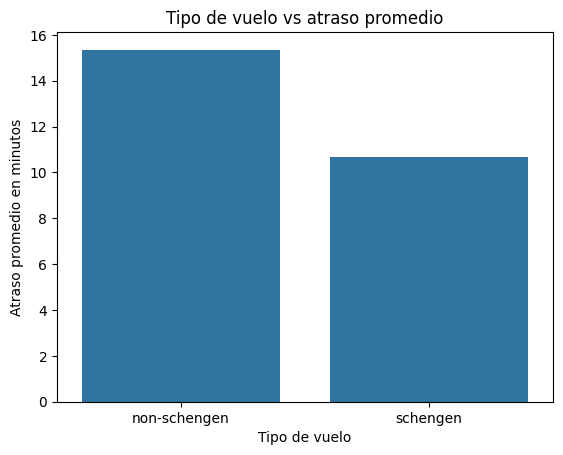

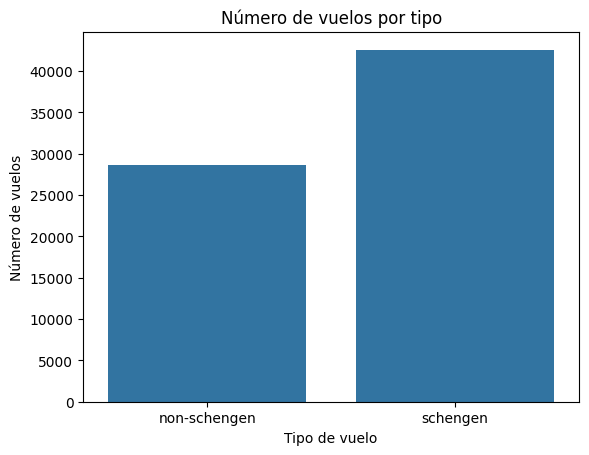

In [ ]:
avg_delay = datos.groupby('schengen')['delay'].mean().reset_index()
sns.barplot(x='schengen', y='delay', data=avg_delay)
plt.title('Tipo de vuelo vs atraso promedio')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Atraso promedio en minutos')
plt.show()

sns.countplot(data= datos, x='schengen')
plt.title('Número de vuelos por tipo')
plt.xlabel('Tipo de vuelo')
plt.ylabel('Número de vuelos')
plt.show()

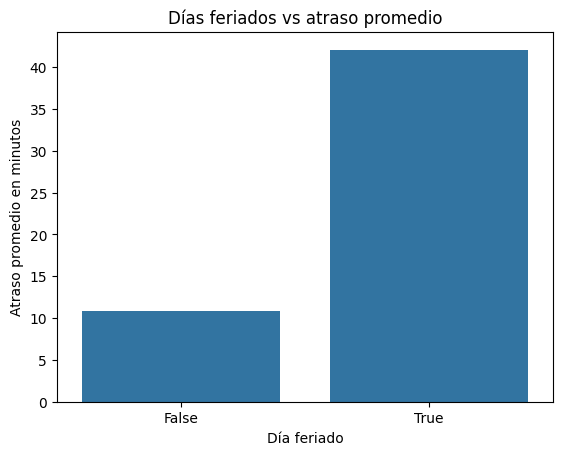

In [ ]:
avg_delay = datos.groupby('is_holiday')['delay'].mean().reset_index()
sns.barplot(x='is_holiday', y='delay', data=avg_delay)
plt.title('Días feriados vs atraso promedio')
plt.xlabel('Día feriado')
plt.ylabel('Atraso promedio en minutos')
plt.show()


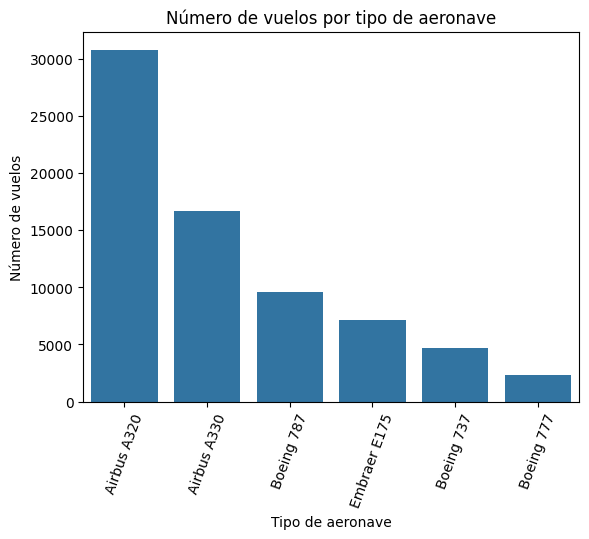

In [ ]:
order = datos['aircraft_type'].value_counts().index
sns.countplot(data= datos, x='aircraft_type', order= order)
plt.title('Número de vuelos por tipo de aeronave')
plt.xticks(rotation=70)
plt.xlabel('Tipo de aeronave')
plt.ylabel('Número de vuelos')
plt.show()

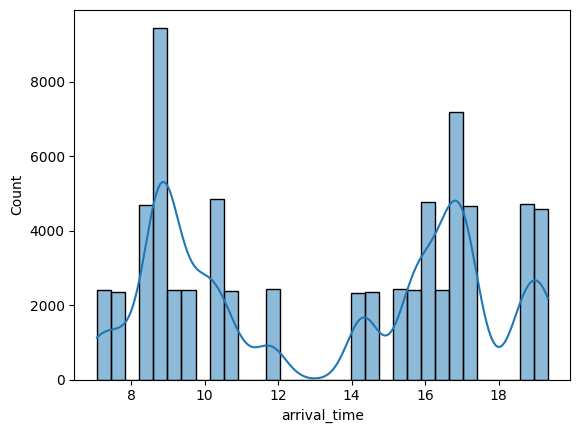

In [ ]:
sns.histplot(data=datos, x='arrival_time', kde=True);

In [ ]:
import numpy as np

def ancho_bin(df, columna):
  q75, q25 = np.percentile(df[columna], [75, 25])
  iqr = q75 -q25
  ancho = 2*iqr * np.power(len(df[columna]), -1/3)
  return ancho

In [ ]:
binwidth = ancho_bin(datos, 'arrival_time')

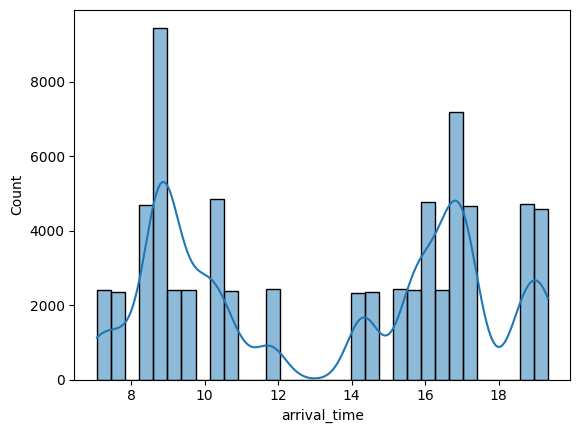

In [ ]:
sns.histplot(data=datos, x='arrival_time', kde=True, binwidth=binwidth);

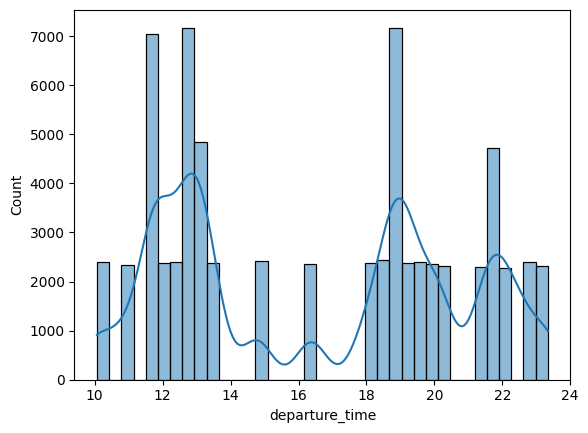

In [ ]:
inwidth = ancho_bin(datos, 'departure_time')
sns.histplot(data=datos, x='departure_time', kde=True, binwidth=inwidth);

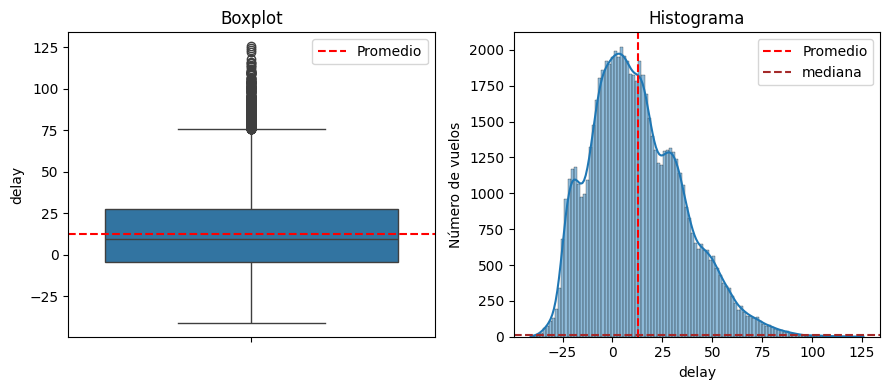

In [ ]:
atraso_promedio = datos['delay'].mean()
atraso_mediana = datos['delay'].median()

fig, ax = plt.subplots(1, 2, figsize=(9,4))

sns.boxplot(data= datos, y='delay',ax = ax[0])
ax[0].set_title('Boxplot')
ax[0].axhline(y=atraso_promedio, color= 'red', linestyle = '--', label='Promedio')
ax[0].legend()

binwidth=ancho_bin(datos, 'delay')
sns.histplot(data=datos, x='delay', ax=ax[1], kde=True, binwidth=binwidth)
plt.ylabel('Número de vuelos')
plt.grid(False)
ax[1].set_title('Histograma')
ax[1].axvline(x=atraso_promedio, color= 'red', linestyle = '--', label='Promedio')
ax[1].axhline(y=atraso_mediana, color= 'brown', linestyle = '--', label='mediana')
ax[1].legend()

plt.tight_layout()
plt.show()

# Aula 2: Feature engineering



In [ ]:
datos.columns

Index(['flight_id', 'airline', 'aircraft_type', 'schengen', 'origin',
       'arrival_time', 'departure_time', 'day', 'year', 'is_holiday', 'delay'],
      dtype='object')

In [ ]:
datos['date']=datos['year'].astype(str)+ ' ' + (datos['day']+1).astype(str)


In [ ]:
datos['date']=pd.to_datetime(datos['date'], format='%Y %j')
datos.tail()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date
71170,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,364,2022,True,25.677277,2022-12-31
71171,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,364,2022,True,52.624348,2022-12-31
71172,7,MM,Boeing 787,schengen,TZF,8.564949,13.564949,364,2022,True,56.167080,2022-12-31
71173,5,BZ,Airbus A320,schengen,ZQO,9.344097,12.344097,364,2022,True,56.758844,2022-12-31
71174,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,364,2022,True,41.401648,2022-12-31


In [ ]:
datos['is_weekend']=datos['date'].dt.weekday.isin([5,6])
datos['day_name'] =datos['date'].dt.day_name()
datos.sample(5)

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
15289,13,BZ,Boeing 787,non-schengen,TCY,10.172731,13.172731,289,2012,False,-15.790631,2012-10-16,False,Tuesday
11470,3,BZ,Embraer E175,schengen,TZF,18.635384,22.635384,34,2012,False,-1.415466,2012-02-04,True,Saturday
25229,29,BZ,Boeing 737,schengen,ZQO,8.591208,11.591208,221,2014,False,9.239544,2014-08-10,True,Sunday
9976,30,BZ,Embraer E175,schengen,PUA,8.923441,12.923441,300,2011,True,61.490958,2011-10-28,False,Friday
9548,17,BZ,Airbus A330,non-schengen,CNU,16.718722,21.718722,271,2011,False,-7.059964,2011-09-29,False,Thursday


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
datos['schengen'] = datos['schengen'].replace({'non-schengen': 0, 'schengen':1})

In [ ]:
datos['is_holiday'] = datos['is_holiday'].replace({False: 0, True:1})
datos['is_weekend'] = datos['is_weekend'].replace({False: 0, True:1})
datos.sample()

,flight_id,airline,aircraft_type,schengen,origin,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,day_name
18061,4,BZ,Airbus A330,1,TCY,11.781391,14.781391,109,2013,0,-16.966099,2013-04-20,1,Saturday


In [ ]:
categoricas = ['airline', 'aircraft_type', 'origin',
        'day_name']

In [ ]:
# from sklearn.compose import make_column_transformer
# from sklearn.preprocessing import OneHotEncoder

# one_hot_enc = make_column_transformer((OneHotEncoder(handle_unknown='ignore'),categoricas),remainder='passthrough')

# datos_1 = one_hot_enc.fit_transform(datos)
# datos = pd.DataFrame(datos_1, columns=one_hot_enc.get_feature_names_out())
# datos

In [ ]:
pd.get_dummies(data=datos, columns=categoricas, dtype=int).head()

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
0,26,0,8.885071,10.885071,0,2010,0,70.205981,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
1,10,0,8.939996,11.939996,0,2010,0,38.484609,2010-01-01,0,...,1,0,0,1,0,0,0,0,0,0
2,3,1,18.635384,22.635384,0,2010,0,2.388305,2010-01-01,0,...,0,1,0,1,0,0,0,0,0,0
3,28,0,15.967963,17.967963,0,2010,0,19.138491,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0
4,15,0,16.571894,19.571894,0,2010,0,15.016271,2010-01-01,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
datos_codificados = pd.get_dummies(data=datos, columns=categoricas, dtype=int)
datos_codificados.sample(5)

,flight_id,schengen,arrival_time,departure_time,day,year,is_holiday,delay,date,is_weekend,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
16649,16,0,17.041281,20.041281,14,2013,0,67.873770,2013-01-15,0,...,0,0,0,0,0,0,0,0,1,0
34912,3,1,18.635384,22.635384,137,2016,0,-21.403007,2016-05-17,0,...,0,1,0,0,0,0,0,0,1,0
29016,1,0,15.496519,18.496519,109,2015,0,4.398179,2015-04-20,0,...,0,0,0,0,1,0,0,0,0,0
34022,1,0,15.496519,18.496519,78,2016,0,1.269093,2016-03-19,1,...,0,0,0,0,0,1,0,0,0,0
19211,27,1,14.376052,16.376052,185,2013,1,35.943822,2013-07-05,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
datos[['arrival_time', 'departure_time']].corr()

,arrival_time,departure_time
arrival_time,1.000000,0.973797
departure_time,0.973797,1.000000


In [ ]:
df =datos_codificados.drop(columns=['flight_id','departure_time', 'day', 'year', 'date',])
df.sample(10)

,schengen,arrival_time,is_holiday,delay,is_weekend,airline_BZ,airline_MM,airline_YE,aircraft_type_Airbus A320,aircraft_type_Airbus A330,...,origin_TCY,origin_TZF,origin_ZQO,day_name_Friday,day_name_Monday,day_name_Saturday,day_name_Sunday,day_name_Thursday,day_name_Tuesday,day_name_Wednesday
4875,1,18.635384,0,-28.755204,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
1830,0,17.041281,1,72.753962,0,0,1,0,1,0,...,0,0,0,0,1,0,0,0,0,0
48211,1,16.245220,0,42.527976,0,0,1,0,1,0,...,0,1,0,0,1,0,0,0,0,0
27912,1,8.923441,0,23.414966,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
267,1,17.033688,0,13.023599,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
59109,0,15.496519,0,1.793180,1,1,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
64855,1,16.245220,0,40.366935,0,0,1,0,1,0,...,0,1,0,1,0,0,0,0,0,0
62603,0,15.967963,0,-20.834886,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
67020,1,7.708301,0,-14.374400,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
24350,1,11.781391,0,-23.583781,0,1,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71175 entries, 0 to 71174
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   schengen                    71175 non-null  int64  
 1   arrival_time                71175 non-null  float64
 2   is_holiday                  71175 non-null  int64  
 3   delay                       71175 non-null  float64
 4   is_weekend                  71175 non-null  int64  
 5   airline_BZ                  71175 non-null  int64  
 6   airline_MM                  71175 non-null  int64  
 7   airline_YE                  71175 non-null  int64  
 8   aircraft_type_Airbus A320   71175 non-null  int64  
 9   aircraft_type_Airbus A330   71175 non-null  int64  
 10  aircraft_type_Boeing 737    71175 non-null  int64  
 11  aircraft_type_Boeing 777    71175 non-null  int64  
 12  aircraft_type_Boeing 787    71175 non-null  int64  
 13  aircraft_type_Embraer E175  711

# Aula 3: Selección y validación del modelo

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(['delay'], axis=1)

In [ ]:
y = df['delay']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.3, random_state=42)
baseline = DummyRegressor()
baseline.fit(X_train, y_train)

DummyRegressor()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_pred_dummy = baseline.predict(X_test)

def calcular_regresion(y_test, y_pred):
  rmse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  metricas = {
      'RMSE': round(rmse**(1/2),4),
      'MAE': round(mae,4),
      'R2': round(r2,4)
  }
  return metricas

In [ ]:
resultados_baseline = calcular_regresion(y_test, y_pred_dummy)

In [87]:
resultados_baseline

{'RMSE': 23.1612, 'MAE': 18.5646, 'R2': -0.0}

In [89]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(max_depth=5, random_state=42)
modelo.fit(X_train,y_train)

y_pred = modelo.predict(X_test)
resultados_rf = calcular_regresion(y_test, y_pred)
resultados_rf

{'RMSE': 13.7479, 'MAE': 11.0262, 'R2': 0.6477}

https://www.scikit-yb.org/en/latest/api/regressor/peplot.html

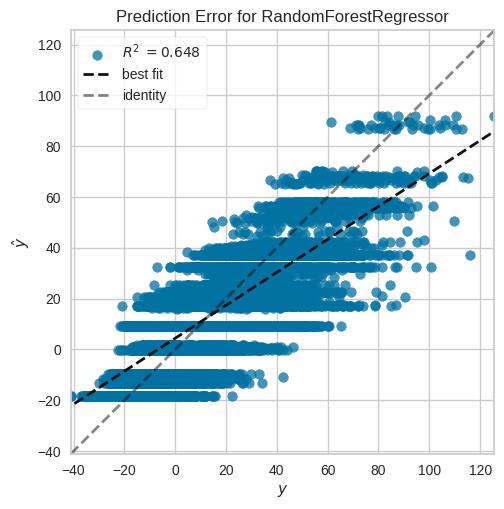

<Axes: title={'center': 'Prediction Error for RandomForestRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [93]:
from yellowbrick.regressor import prediction_error

visualizer = prediction_error(modelo, X_train, y_train, X_test, y_test)
visualizer.show()

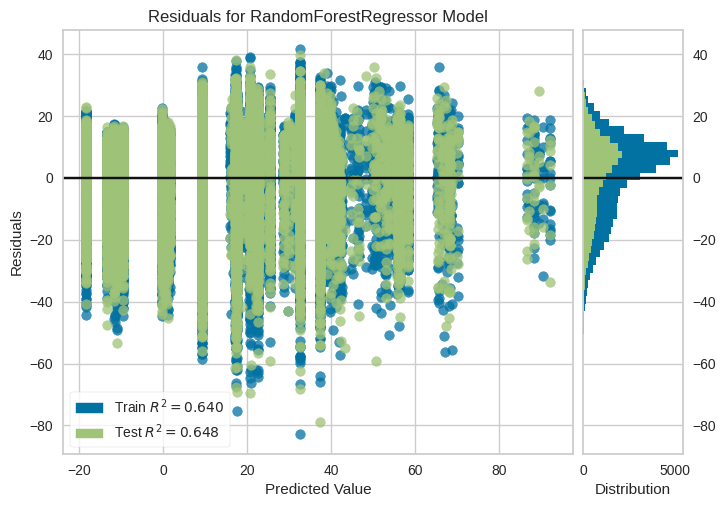

In [94]:
from yellowbrick.regressor import residuals_plot
viz = residuals_plot(modelo, X_train, y_train, X_test, y_test)

In [99]:
from sklearn.model_selection import KFold, cross_validate

scoring={
    'RMSE': 'neg_root_mean_squared_error',
    'MAE' : 'neg_mean_absolute_error',
    'R2': 'r2'
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(modelo, X_train, y_train, scoring=scoring, cv=cv)

In [100]:
cv_results

{'fit_time': array([3.72834635, 3.08198214, 4.14909959, 3.08883667, 3.08712339]),
 'score_time': array([0.05522823, 0.05715704, 0.05587387, 0.05382919, 0.06200099]),
 'test_RMSE': array([-13.76989748, -13.86928373, -13.96807668, -13.85347402,
        -13.98953528]),
 'test_MAE': array([-11.03252135, -11.13534968, -11.2094657 , -11.14503717,
        -11.25775565]),
 'test_R2': array([0.64559466, 0.63745663, 0.63523823, 0.64089302, 0.63441267])}

#Aula 4: Optimización de hiperparámetros

In [105]:
importances = modelo.feature_importances_

In [106]:
feature_importances = pd.DataFrame({'Features': X.columns, 'Importances': (importances*100).round(2)}).sort_values('Importances', ascending= False)
feature_importances

,Features,Importances
4,airline_BZ,53.03
2,is_holiday,14.59
7,aircraft_type_Airbus A320,10.07
8,aircraft_type_Airbus A330,5.76
12,aircraft_type_Embraer E175,4.59
1,arrival_time,3.60
11,aircraft_type_Boeing 787,2.64
20,origin_TCY,2.09
15,origin_CSF,1.60
19,origin_PUA,1.03


In [109]:
resultados = pd.DataFrame(index=['RMSE','MAE', 'R2'])
model_features= RandomForestRegressor(max_depth=5, random_state=42)
ct_features= [i if i !=0 else 1 for i in range(0,35,5)]

for i in ct_features:
  selected_features= feature_importances['Features'].values[:i]
  X_train_sel=X_train[selected_features]
  X_test_sel= X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred =model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

,1,5,10,15,20,25,30
RMSE,18.8331,15.1564,13.7587,13.7497,13.7498,13.7477,13.7479
MAE,14.9620,12.0605,11.0422,11.0285,11.0280,11.0261,11.0262
R2,0.3388,0.5718,0.6471,0.6476,0.6476,0.6477,0.6477


In [112]:
resultados = pd.DataFrame(index=['RMSE','MAE', 'R2'])
model_features= RandomForestRegressor(max_depth=5, random_state=42)
ct_features= range(10,16)

for i in ct_features:
  selected_features= feature_importances['Features'].values[:i]
  X_train_sel=X_train[selected_features]
  X_test_sel= X_test[selected_features]
  model_features.fit(X_train_sel, y_train)
  y_pred =model_features.predict(X_test_sel)
  metricas = calcular_regresion(y_test, y_pred)
  resultados[i] = list(metricas.values())

resultados

,10,11,12,13,14,15
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476


In [115]:
selected_features= feature_importances['Features'].values[:13]
X_selected_features =X[selected_features]
X_selected_features

,airline_BZ,is_holiday,aircraft_type_Airbus A320,aircraft_type_Airbus A330,aircraft_type_Embraer E175,arrival_time,aircraft_type_Boeing 787,origin_TCY,origin_CSF,origin_PUA,origin_TZF,day_name_Friday,origin_MWL
0,0,0,1,0,0,8.885071,0,1,0,0,0,1,0
1,0,0,1,0,0,8.939996,0,1,0,0,0,1,0
2,1,0,0,0,1,18.635384,0,0,0,0,1,1,0
3,1,0,0,1,0,15.967963,0,0,0,0,0,1,0
4,1,0,0,1,0,16.571894,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71170,1,1,0,0,1,18.635384,0,0,0,0,1,0,0
71171,1,1,0,1,0,16.718722,0,0,0,0,0,0,0
71172,0,1,0,0,0,8.564949,1,0,0,0,1,0,0
71173,1,1,1,0,0,9.344097,0,0,0,0,0,0,0


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X_selected_features, y, random_state=42)

In [125]:
param_grid = {
    'max_depth':[5,10,15],
    'min_samples_leaf':[1,2,3],
    'min_samples_split': [2,4,6],
    'n_estimators': [100,150,200]
    }

In [118]:
from sklearn.model_selection import GridSearchCV

In [126]:
cv= KFold(n_splits=5, shuffle=True, random_state=42)
model_grid= GridSearchCV(RandomForestRegressor(random_state=42),
                         param_grid=param_grid, scoring='r2', cv=cv)
model_grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 4, 6],
                         'n_estimators': [100, 150, 200]},
             scoring='r2')

In [127]:
model_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

In [128]:
y_pred_grid = model_grid.predict(X_test)
metricas_modelo_grid= calcular_regresion(y_test, y_pred_grid)
metricas_modelo_grid

{'RMSE': 13.2308, 'MAE': 10.6296, 'R2': 0.6754}

In [129]:
resultados['modelo_grid']=list(metricas_modelo_grid.values())
resultados

,10,11,12,13,14,15,modelo_grid
RMSE,13.7587,13.7564,13.7526,13.7526,13.7497,13.7497,13.2308
MAE,11.0422,11.0425,11.0312,11.0314,11.0285,11.0285,10.6296
R2,0.6471,0.6472,0.6474,0.6474,0.6476,0.6476,0.6754


In [130]:
import pickle

try:
  with open('champion.pkl', 'wb') as file:
    pickle.dump(model_grid.best_estimator_, file)

  print('modelo serializaco con éxito')
except Exception as e:
  print('Se presentó error al almacenar modelo:',str(e))

modelo serializaco con éxito


In [131]:
nueva_muestra = [0.0, 10.8941, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [136]:
file_path = '/content/champion.pkl'

try:
    with open(file_path, 'rb') as file:
        model_grid = pickle.load(file)
    print("¡Modelo cargado con éxito!")
except Exception as e:
    print("Ocurrió un error al cargar el modelo:", str(e))

¡Modelo cargado con éxito!


In [137]:
y = model_grid.predict([nueva_muestra])[0]

In [138]:
y

np.float64(48.73321005358915)